In [101]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import skewnorm, skew, norm, shapiro

In [23]:
a = 4
mean, var, skew, kurt = skewnorm.stats(a, moments='mvsk')

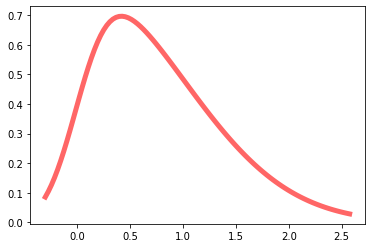

In [24]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(skewnorm.ppf(0.01, a),
                skewnorm.ppf(0.99, a), 100)
ax.plot(x, skewnorm.pdf(x, a),
       'r-', lw=5, alpha=0.6, label='skewnorm pdf')

(array([ 6., 20., 25., 31.,  7.,  8.,  3.]),
 array([-1.60373596, -0.95672488, -0.3097138 ,  0.33729728,  0.98430836,
         1.63131944,  2.27833052,  2.9253416 ]),
 <a list of 7 Patch objects>)

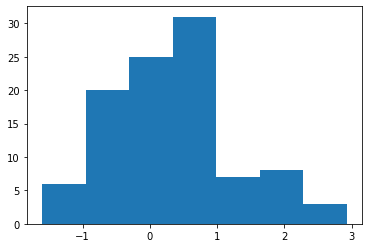

In [25]:
shape = 0.5
x = skewnorm.rvs(shape, loc=0, scale=1, size=100)
plt.hist(x, bins=7)

In [77]:
def gen_skewnormal(mean, var, alpha, size, random_state=None):
    # generate standard skew normal distribution
    X = skewnorm.rvs(alpha, loc=0, scale=1, size=size, random_state=random_state)
    
    # theory expectation value (mean) and variance of standard skew normal distribution
    tmean = np.sqrt(2/np.pi) * alpha / np.sqrt(1+alpha**2)
    tvar = 1 - 2/np.pi * alpha**2 / (1+alpha**2)

    # (1)adjust var (2)adjust mean. Order can not reverse
    # (1)
    X = np.sqrt(var/tvar) * X
    # (2)
    tmean = np.sqrt(var/tvar) * np.sqrt(2/np.pi) * alpha / np.sqrt(1+alpha**2)
    X = X + mean - tmean  # (2)
    
    return X

In [78]:
X = gen_skewnormal(5, 2, 4, 100000, 42)
X.var()

2.004927890730308

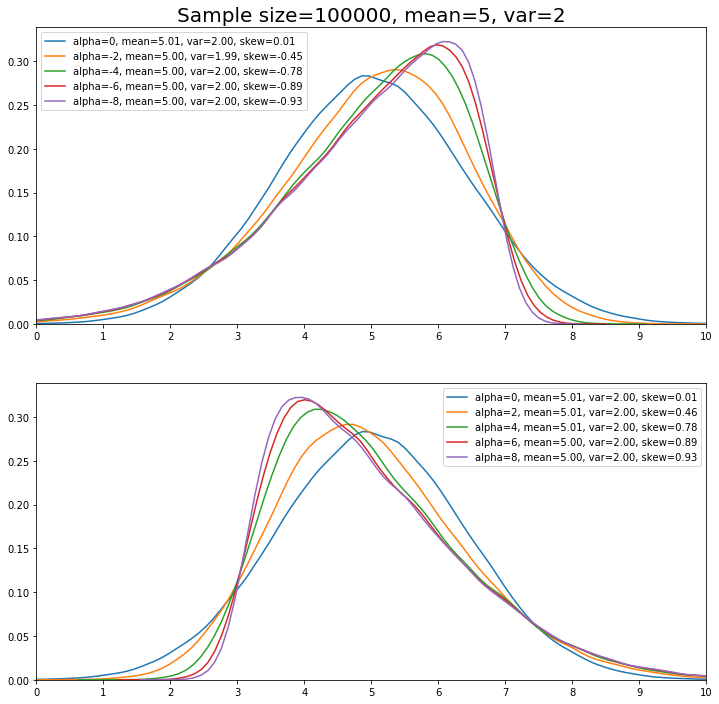

In [92]:
size = 100000
mean = 5
var = 2

fig, axs = plt.subplots(figsize=(12, 12), nrows=2)
for alpha in np.arange(0, 10, 2):
    alpha *= -1
    X = gen_skewnormal(mean, var, alpha, size, 42)
    sns.kdeplot(X, label=f'alpha={alpha}, mean={X.mean():.2f}, var={X.var():.2f}, skew={skew(X):.2f}', ax=axs[0])

for alpha in np.arange(0, 10, 2):
    X = gen_skewnormal(mean, var, alpha, size, 42)
    sns.kdeplot(X, label=f'alpha={alpha}, mean={X.mean():.2f}, var={X.var():.2f}, skew={skew(X):.2f}', ax=axs[1])
    
title = f'Sample size={size}, mean={mean}, var={var}'
axs[0].set_title(title, fontsize=20)
axs[0].set_xlim([mean-5, mean+5])
axs[0].set_xticks([i for i in range(0, 11)])
axs[1].set_xlim([mean-5, mean+5])
axs[1].set_xticks([i for i in range(0, 11)]);

,mean,var,skew,W,p-value
-1.6,0.001041,1.031497,-0.323,0.994,0.00000
-1.4,0.000800,1.033960,-0.258,0.996,0.00000
-1.2,0.000524,1.036309,-0.192,0.998,0.00001
-1.0,0.000212,1.038345,-0.129,0.999,0.00810
-0.8,-0.000137,1.039803,-0.073,1.000,0.39403
-0.6,-0.000519,1.040369,-0.030,1.000,0.97418
-0.4,-0.000925,1.039741,-0.002,1.000,0.99510
-0.2,-0.001342,1.037714,0.011,1.000,0.91051
-0.0,-0.001752,1.034284,0.014,1.000,0.67355
0.2,-0.002136,1.029684,0.016,1.000,0.45383


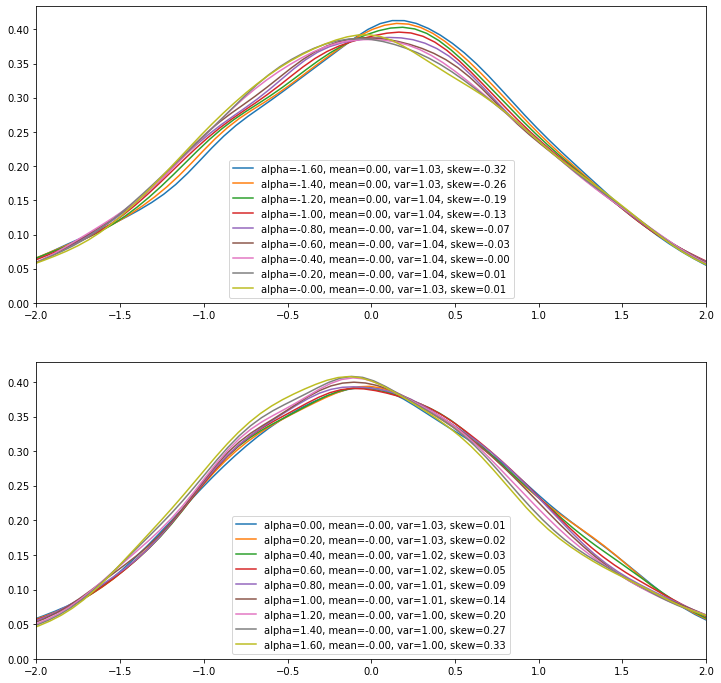

In [186]:
fig, axs = plt.subplots(figsize=(12, 12), nrows=2)

size = 4000
result = {}
for alpha in np.arange(-1.6, 0.2, 0.2):
    X = gen_skewnormal(0, 1, alpha, size, 42)
    W, p = shapiro(X)
    result[alpha] = [X.mean(), X.var(), skew(X), W, p]
    label = f'alpha={alpha:.2f}, mean={X.mean():.2f}, var={X.var():.2f}, skew={skew(X):.2f}'
    sns.kdeplot(X, label=label, ax=axs[0])
    
for alpha in np.arange(0, 1.8, 0.2):
    X = gen_skewnormal(0, 1, alpha, size, 42)
    W, p = shapiro(X)
    if alpha != 0:
        result[alpha] = [X.mean(), X.var(), skew(X), W, p]
    label = f'alpha={alpha:.2f}, mean={X.mean():.2f}, var={X.var():.2f}, skew={skew(X):.2f}'
    sns.kdeplot(X, label=label, ax=axs[1])
    
axs[0].set_xlim([-2, 2])
axs[1].set_xlim([-2, 2])

"""
result = {}
for alpha in np.arange(-1.6, 1.8, 0.2):
    X = gen_skewnormal(0, 1, alpha, 4000, 42)
    W, p = shapiro(X)
    result[alpha] = [X.mean(), X.var(), skew(X), W, p]
"""

df = pd.DataFrame(result, index=['mean', 'var', 'skew', 'W', 'p-value']).T
df.index.name = 'alpha'

df_s = df.copy()
df_s.index = [f'{idx:.1f}' for idx in df_s.index]
df_s['skew'] = df_s['skew'].map(lambda y: f'{y:.3f}')
df_s['W'] = df_s['W'].map(lambda y: f'{y:.3f}')
df_s['p-value'] = df_s['p-value'].map(lambda y: f'{y:.5f}')
df_s

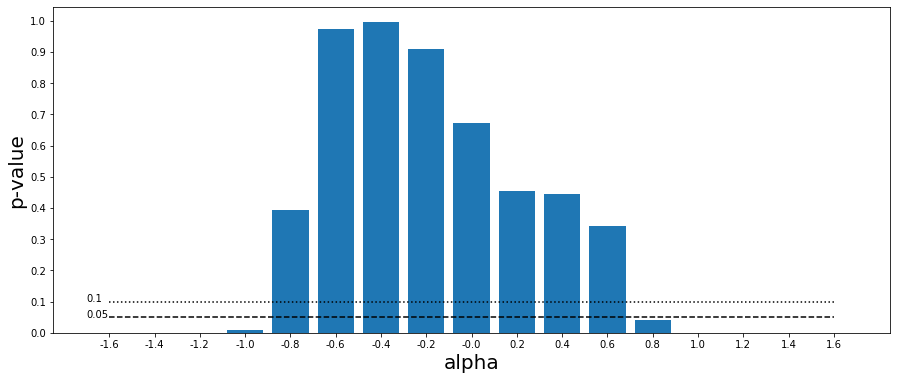

In [187]:
plt.figure(figsize=(15, 6))
x = df_s.index.values
p = df['p-value'].values
plt.bar(x, p)

plt.hlines(0.1, 0, 16, ls='dotted')
plt.hlines(0.05, 0, 16, ls='dashed')
plt.text(-0.5, 0.1, '0.1')
plt.text(-0.5, 0.05, '0.05')

plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('alpha', fontsize=20)
plt.ylabel('p-value', fontsize=20);